# Group 27 (Assignment 1)
* Andrey Protas
* Weixing Wang
* Daniyal Khalid
* Saqib Khan
* Mujtaba Shahid Faizi
* Utku Ayvaz

In [1]:
# Packages
import numpy as np
from math import pi

## Task1


* $C_1$ is a unit cube centered around origin. $C_d$ is a cube with side d, centered around origin. Since X is uniformly distributed, probability is proportional to relative volume of 2 cubes, but no larger than 1.
    * For $q=1$, then d can be any value $\geq 1$, regardless of p, since whole $C_1$ lies within $C_d$.
    * For $q=0$, then $d=0$, regardless of p, since probability can only be 0, if volume is 0, otherwise it's positive.
    * For $q \in (0,1)$, we have: $\dfrac{d^p}{1^p}=q$, take $\sqrt[p]{}$ of both sides, we get $d=\sqrt[p]{q}$.
* $Pr(\lVert X^p \rVert_\infty > 2.576) = 1 - Pr(\lVert X^p \rVert_\infty \leq 2.576) \stackrel{ind. components}{=} 1 - (Pr(\lVert X \rVert_\infty \leq 2.576))^p = 1-0.99^p$

In [2]:
print("For p=2: ", 1-0.99**2, "\nFor p=3: ", 1-0.99**3, "\nFor p=500: ", 1-0.99**500)

For p=2:  0.01990000000000003 
For p=3:  0.029700999999999977 
For p=500:  0.9934295169575854


## Task2

In [3]:
# Function to sample n vectors of dimension d from the uniform distribution [-1,1]
def sample_vectors(n, d):
    return np.random.uniform(low=-1, high=1, size=(n,d))

# Function to compute the average of the minimum angles between vectors of a list of vectors
'''
The function performs the following for a list of n vectors:
For each vector:
    Obtain angles against all other vectors
    Obtain the minimum of these angles
The average is calculated from the minimum value generated by each vector and returned
'''
def compute_average_min_angles(vectors):

    # Helper function to compute the minimum angle of a specific vector against all other vectors
    # Returns a list of n angles, where n is the total number of vectors
    def compute_min_angle_against_all_other_vectors(vector, index):
        
        # Helper function to compute the angle between two vectors
        def compute_angle(v1,v2):
            # Get unit vectors for v1 and v2
            uv1 = v1 / np.linalg.norm(v1)
            uv2 = v2 / np.linalg.norm(v2)
            # Use the unit vectors to calculate the angle
            angle = np.arccos(np.clip(np.dot(uv1, uv2), -1.0, 1.0))
            return angle if angle <= pi/2 else pi-angle
        
        # Get the angle against all other vectors. Note: Angle against the vector itself is set to 999, which can
        # never be the minimum
        angles_against_other_vectors = [compute_angle(vector, v) if i != index else 999 for i,v in enumerate(vectors)]
        # Return the minimum of these angles
        return min(angles_against_other_vectors, key=abs)
    
    # For each vector, get the minimum angle it has with any other vector
    min_angles = [compute_min_angle_against_all_other_vectors(v,i) for i,v in enumerate(vectors)]
    # return the average of these minimums
    return sum(min_angles)/len(min_angles)

In [7]:
# Get the average values for d = 1...1000
averages = [compute_average_min_angles(sample_vectors(100,d)) for d in range(1, 1001)]

KeyboardInterrupt: 

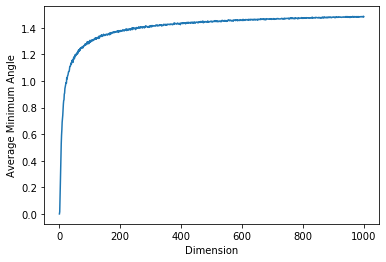

In [5]:
# Plot the average minimum angle against dimensions
import matplotlib.pyplot as plt

dimensions = [d for d in range(1,1001)]
plt.xlabel("Dimension")
plt.ylabel("Average Minimum Angle")
plt.plot(dimensions, averages)
plt.show()

<strong>Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a d-dimensional space?</strong>

<p>The average minimum angle between two vectors starts to become constant in higher dimensions. For two randomly sampled vectors, the vectors start to become equidistant as d is increased. </p>

<strong> Does the result change if the sample size increases?</strong>

In [6]:
# Repeat the experiment with n=500
averages = [compute_average_min_angles(sample_vectors(500,d)) for d in range(1, 1001)]
dimensions = [d for d in range(1,1001)]
plt.xlabel("Dimension")
plt.ylabel("Average Minimum Angle")
plt.plot(dimensions, averages)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Repeat the experiment with n = 5
averages = [compute_average_min_angles(sample_vectors(5,d)) for d in range(1, 1001)]
dimensions = [d for d in range(1,1001)]
plt.xlabel("Dimension")
plt.ylabel("Average Minimum Angle")
plt.plot(dimensions, averages)
plt.show()

As we can see above, the result is the same even if we change the sample size from 100 to 500. If we change the sample size to a very small value like 5, then the trend is still the same although the data points are noisier. So the result does not change if the sample size changes.

## Task3

### Question 3 (a):
The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event X = 1 and Y = 1 is 0.02). Is this table a probability table? If so, why?

Yes, it is the <b>Conditional Probability Table (CFT)</b> and it is defined for a set of discrete and mutually dependent random variables <b>X</b> and <b>Y</b>. The reason being that all the numbers in this table sum to 1 which represents the total joint probability distribution of the random variables.

### Question 3 (b):
Based on Figure 1 give the conditional expectation E[Y|X=2][Y] and the probability of the event X = 1 under the condition that Y = 3.

In [8]:
p_table = np.array([[0.4, 0.14,0.05], [0.02,0.26,0.13]])

# Marginal Probabilities of random variables X and Y
p_x = np.sum(p_table, axis=1)
p_y = np.sum(p_table, axis=0)

print('Marginal probability: [p(x=1), p(x=2)] = {}'.format(p_x))
print('Marginal probability: [p(y=1), p(y=2), p(y=3)] = {}'.format(p_y))

#Conditional Expectation of E[Y|X=2][Y]
Y = np.array([1,2,3])
conditional_expectation = np.sum(np.dot(Y, p_table[0] / p_x[0]))

print("\nThe conditional mean of E[Y|X=2][Y] = {}".format(conditional_expectation))

#Conditional Prbability of X=1 and Y=3

p_x1y3 = p_table[1][2] / p_x[1]

print("\nThe conditional probability of X=1 and Y=3 = {}".format(p_x1y3))

Marginal probability: [p(x=1), p(x=2)] = [0.59 0.41]
Marginal probability: [p(y=1), p(y=2), p(y=3)] = [0.42 0.4  0.18]

The conditional mean of E[Y|X=2][Y] = 1.4067796610169492

The conditional probability of X=1 and Y=3 = 0.3170731707317073


### Question 3 (c):

$\int_0^{1/2} \int_0^1 1 dx dy = \int_0^{1/2} \left[x\right]_0^1 dy = \int_0^{1/2} 1 dy = \left[y\right]_0^{1/2} = 1/2 \neq$ 1

Therefore, the given function is not a joint density function for the two random variables X,Y.

### Question 3 (d):

$P_X (x)$ for $ 0 \leq y = \int_0^\infty 2e^{-(x+y)} dy = \int_0^\infty 2e^{-x}e^{-y}dy = 2e^{-x}\int_0^\infty e^{-y}dy = 2e^{-x}\left[-e^{-y}\right]_0^\infty = 2e^{-x}(0+1) = 2e^{-x}$

$P_Y (y)$ for $ 0 \leq x \leq y = \int_0^y 2e^{-(x+y)} dx = \int_0^y 2e^{-x}e^{-y}dx = 2e^{-y}\int_0^y e^{-x}dx = 2e^{-y}\left[-e^{-x}\right]_0^y = 2e^{-y}(-e^{-y}+1) = -2e^{-2y}+2e^{-y}$

$P_X (x) = \begin{cases}
2e^{-x}&\text{for $0 \leq x \leq y$}\\
0&\text{otherwise}\\
\end{cases}$

$P_Y (y) =
\begin{cases}
-2e^{-2y}+2e^{-y}&\text{for $0 \leq y$}\\
0&\text{otherwise}\\
\end{cases}$

### Question 3 (e):

$P_Y (y)$ for $ 0 < x < 3$
$= \int_0^3 \frac{1}{15}(2x+4y) dx$
$= \frac{2}{15} \int_0^3 x dx + \frac{4y}{15}  \int_0^3 1 dx$
$= \frac{2}{15} \left[\frac{x^2}{2}\right]_0^3 + \frac{4y}{15}  \left[x\right]_0^3$
$= \frac{2}{15} (\frac{9}{2}) + \frac{4y}{15} (3)$
$= \frac{3+4y}{5}$

$P(X\leq2 | Y=\frac{1}{2})$
$= \int_0^2 \frac{P(x,y)}{P_Y(y)}dx$
$= \int_0^2(\frac{2x+4y}{15}.\frac{5}{3+4y})$
$= \frac{1}{9+12y}\int_0^2 2x+4y dx$
$= \frac{1}{9+12y} 2\left[\frac{x^2}{2}\right]_0^2 + 4y\left[x\right]_0^2$
$= \frac{1}{9+12y}(4+8y) $
$\text{for $Y=\frac{1}{2}$, we get}\\ $
$P(X\leq2 | Y=\frac{1}{2})$
$= \frac{8}{15}$

$P(X\leq2 | Y=\frac{1}{2}) = $
$\begin{cases}
\frac{8}{15}&\text{for $0 < x < 3, 0 < y < 1$}\\
0&\text{otherwise}\\
\end{cases}$

## Task4

Because
$$
\begin{align}
C &= E[(X-\mu)(X-\mu)^T] \\
\end{align}
$$ 
we have
$$
\begin{align}
C^T &= E[(X-\mu)(X-\mu)^T]^T \\
&= E[((X-\mu)(X-\mu)^T)^T] \\
&= E[(X-\mu)(X-\mu)^T] \\
&= C 
\end{align}
$$ 
$C$ is symmetric. \
For any $y \in R^p$, we have 
$$
\begin{align}
y^TCy &= y^TE[(X-\mu)(X-\mu)^T]y \\
&= E[y^T(X-\mu)(X-\mu)^Ty] \\
&= E[((X-\mu)^Ty)^2] \geq0\\
\end{align}
$$ 
thus $C$ is positive semidefinite